### Logarithmische Regression mit ausgewählten Features


Training Score: 0.781
Test Score: 0.786

Kreuzvalidierung Scores: [0.80612245 0.79081633 0.78571429 0.74871795 0.77435897]
Durchschnittliche CV Score: 0.781 (+/- 0.038)

Feature Importance:
                                    Feature  Coefficient
10                             hot_enc__USA     1.743223
3                       vo2_max_transformed     0.573496
9                          hot_enc__Premium     0.531111
5               age_of_customer_transformed    -0.453464
12                              hot_enc__UK    -0.314120
2        running_hours_per_week_transformed     0.259797
13                           hot_enc__India    -0.251669
1         biking_hours_per_week_transformed     0.224816
0       swimming_hours_per_week_transformed     0.213114
11                         hot_enc__Germany    -0.128869
4   10k_running_time_prediction_transformed    -0.125071
7                customer_years_transformed    -0.118544
6                             hot_enc__Male     0.073416
8     suppor

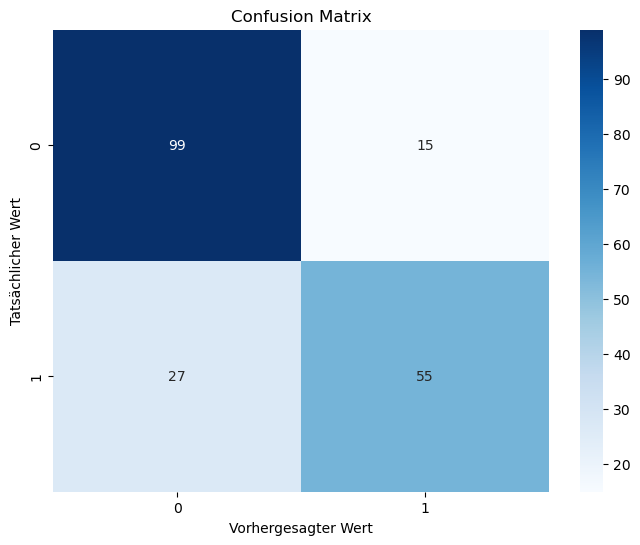


Klassifikationsbericht:
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.82       114
         1.0       0.79      0.67      0.72        82

    accuracy                           0.79       196
   macro avg       0.79      0.77      0.77       196
weighted avg       0.79      0.79      0.78       196



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Daten einlesen
def load_and_prepare_data():
    data = pd.read_csv(r'C:\Users\laukat\OneDrive - Mediengruppe RTL\HDM Data Analyti\Projekt Meth John\project_intro_ai\data\processed\triathlon_watch_training_preprocessed_andreas.csv')
    
    # Feature-Auswahl
    features = [
        # Trainingsmetriken (bereits transformiert)
        'swimming_hours_per_week_transformed',
        'biking_hours_per_week_transformed',
        'running_hours_per_week_transformed',
        'vo2_max_transformed',
        '10k_running_time_prediction_transformed',
        
        # Demografische Daten
        'age_of_customer_transformed',
        'hot_enc__Male',
        
        # Nutzungsmuster
        'customer_years_transformed',
        'support_cases_of_customer_transformed',
        
        # Subscription
        'hot_enc__Premium',
        
        # Ausgewählte geografische Features
        'hot_enc__USA',
        'hot_enc__Germany',
        'hot_enc__UK',
        'hot_enc__India'
    ]
    
    X = data[features]
    y = data['user_of_latest_model']
    
    return X, y

def train_and_evaluate_model(X, y):
    # Train-Test-Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    # Modell erstellen und trainieren
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train, y_train)
    
    # Modell evaluieren
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    print(f"Training Score: {train_score:.3f}")
    print(f"Test Score: {test_score:.3f}")
    
    # Kreuzvalidierung
    cv_scores = cross_val_score(model, X, y, cv=5)
    print(f"\nKreuzvalidierung Scores: {cv_scores}")
    print(f"Durchschnittliche CV Score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    
    # Feature Importance
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_[0]
    })
    feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)
    
    print("\nFeature Importance:")
    print(feature_importance)
    
    # Confusion Matrix auf Testdaten
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Tatsächlicher Wert')
    plt.xlabel('Vorhergesagter Wert')
    plt.show()
    
    # Detaillierter Klassifikationsbericht
    print("\nKlassifikationsbericht:")
    print(classification_report(y_test, y_pred))
    
    return model, feature_importance

# Hauptausführung
if __name__ == "__main__":
    X, y = load_and_prepare_data()
    model, importance = train_and_evaluate_model(X, y)